
🟡 Step 1: Downloading gold price data (GOLDBEES.BO)...
✅ Download complete.
Price            Close        High         Low        Open      Volume
Ticker     GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO
Date                                                                  
2010-02-05   15.765000   16.011000     15.7385   15.980000     2836000
2010-02-08   16.062500   16.098000     15.9600   16.031000      445700
2010-02-09   15.997200   16.065001     15.9600   16.065001      669100
2010-02-10   16.060900   16.108999     16.0221   16.090000      335400
2010-02-11   16.059299   16.099001     16.0305   16.099001      385300

🟡 Step 2: Adding technical indicators...

🟡 Step 3: Calculating Bollinger Bands...

✅ Collected 3784 rows of processed GOLDBEES data.
📁 Saved processed GOLDBEES gold data to goldbees_india_processed.csv


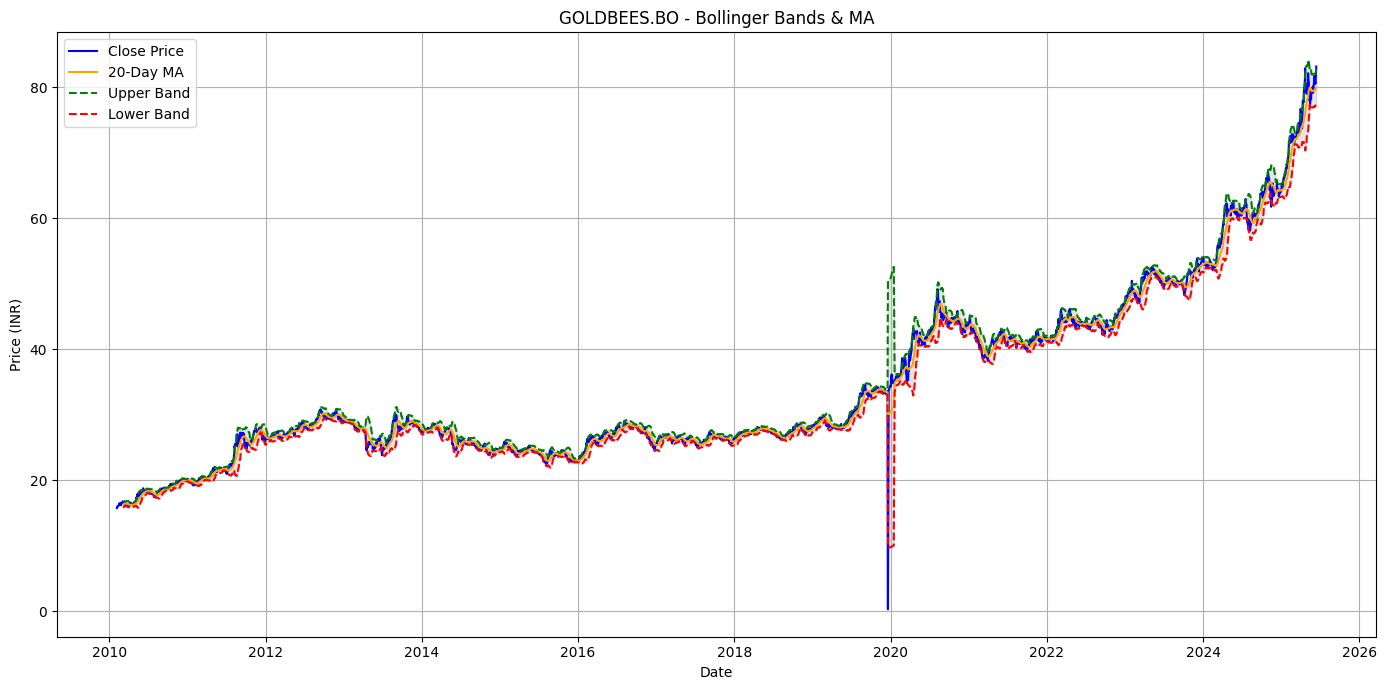

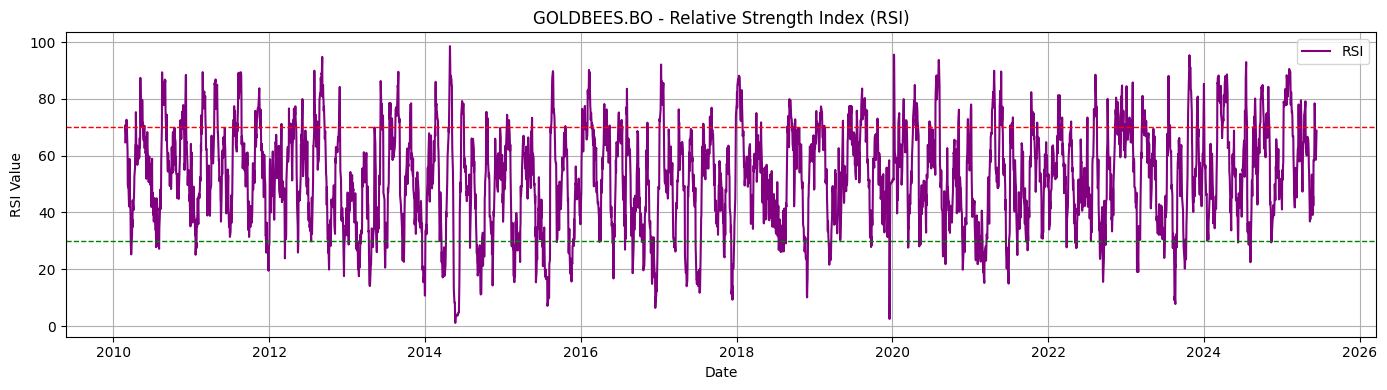

In [6]:
# Collect and process GOLDBEES (Indian Gold ETF) data with technical indicators
# ---------------------------------------------------------------------     
  
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(prices: pd.Series, period: int = 14) -> pd.Series:
    """Calculate Relative Strength Index (RSI)"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def collect_gold_prices(start_date: datetime, end_date: datetime) -> pd.DataFrame:
    """Collect historical GOLDBEES (Indian ETF) prices and compute indicators"""
    try:
        print("\n🟡 Step 1: Downloading gold price data (GOLDBEES.BO)...")
        gold = yf.download('GOLDBEES.BO', start=start_date, end=end_date, progress=False)
        print("✅ Download complete.")
        print(gold.head())

        if isinstance(gold.columns, pd.MultiIndex):
            gold.columns = gold.columns.get_level_values(0)

        gold = gold[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

        print("\n🟡 Step 2: Adding technical indicators...")
        gold['Returns'] = gold['Close'].pct_change()
        gold['MA_5'] = gold['Close'].rolling(window=5).mean()
        gold['MA_20'] = gold['Close'].rolling(window=20).mean()
        gold['MA_50'] = gold['Close'].rolling(window=50).mean()
        gold['Volatility'] = gold['Returns'].rolling(window=20).std()
        gold['RSI'] = calculate_rsi(gold['Close'])

        print("\n🟡 Step 3: Calculating Bollinger Bands...")
        rolling_std = gold['Close'].rolling(window=20).std()
        gold['BB_upper'] = gold['MA_20'] + (rolling_std * 2)
        gold['BB_lower'] = gold['MA_20'] - (rolling_std * 2)
        gold['BB_width'] = gold['BB_upper'] - gold['BB_lower']
        gold['BB_position'] = (gold['Close'] - gold['BB_lower']) / gold['BB_width']

        print(f"\n✅ Collected {len(gold)} rows of processed GOLDBEES data.")
        return gold

    except Exception as e:
        print(f"\n❌ Error collecting gold prices: {e}")
        return pd.DataFrame()

# Run and plot
if __name__ == "__main__":
    start = datetime(2010, 1, 1)
    end = datetime(2026, 1, 1)
    df = collect_gold_prices(start, end)

    if not df.empty:
        df.to_csv("goldbees_india_ETF_prices_processed.csv")
        print("📁 Saved processed GOLDBEES gold data to goldbees_india_processed.csv")

        # Plot Bollinger Bands
        plt.figure(figsize=(14, 7))
        plt.plot(df['Close'], label='Close Price', color='blue')
        plt.plot(df['MA_20'], label='20-Day MA', color='orange')
        plt.plot(df['BB_upper'], label='Upper Band', linestyle='--', color='green')
        plt.plot(df['BB_lower'], label='Lower Band', linestyle='--', color='red')
        plt.fill_between(df.index, df['BB_upper'], df['BB_lower'], color='gray', alpha=0.2)
        plt.title('GOLDBEES.BO - Bollinger Bands & MA')
        plt.xlabel('Date')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot RSI
        plt.figure(figsize=(14, 4))
        plt.plot(df['RSI'], label='RSI', color='purple')
        plt.axhline(70, color='red', linestyle='--', linewidth=1)
        plt.axhline(30, color='green', linestyle='--', linewidth=1)
        plt.title('GOLDBEES.BO - Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
